In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn for statistical plots
import seaborn as sns
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression #scikit learn library



In [2]:
mpg_df=pd.read_csv('car-mpg.csv')         #index_col=9 (to make car_name column as our index of data)
mpg_df.head() 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
mpg_df.corr()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.815445,0.385187,0.305194,0.572691,1.000000


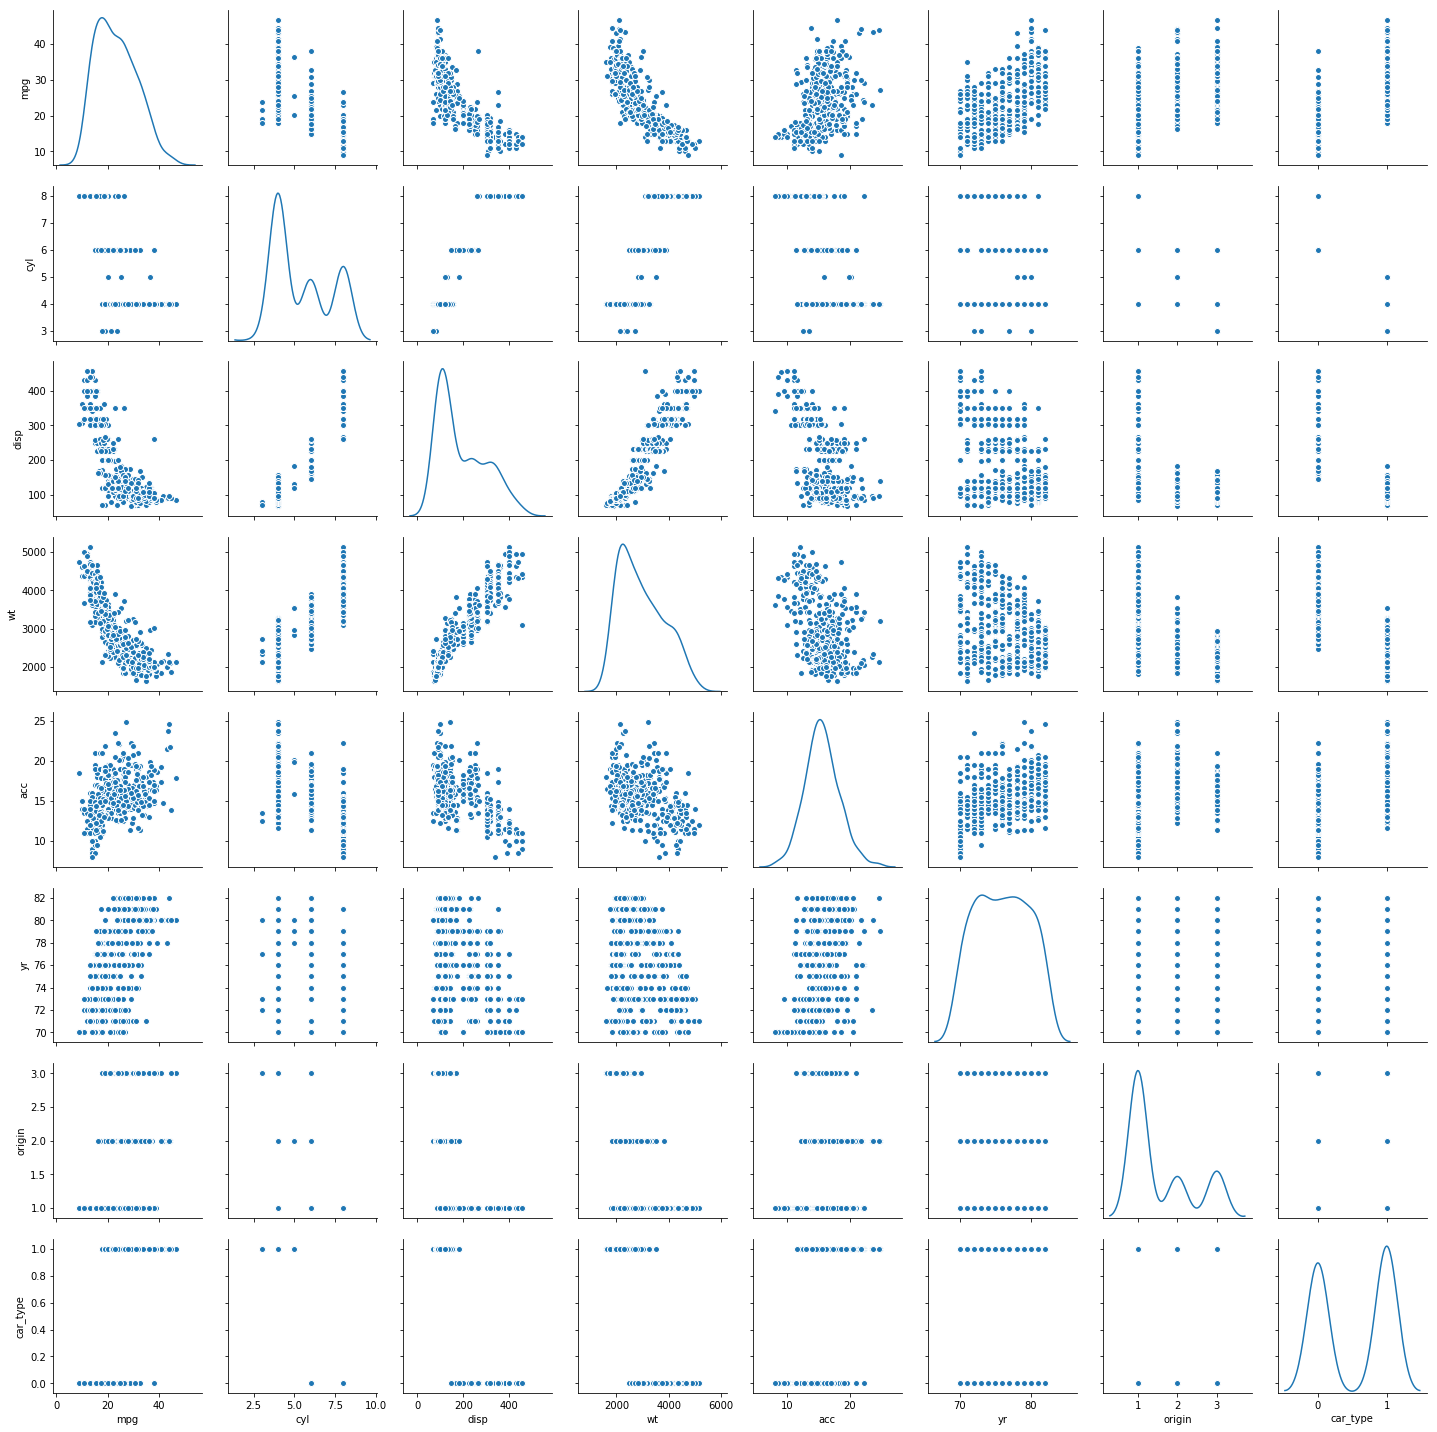

In [4]:
sns.pairplot(mpg_df,diag_kind='kde')

In [5]:
x=mpg_df[['wt','disp','cyl','car_type']]
y=mpg_df[['mpg']]

In [6]:
model=LinearRegression()

In [7]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.coef_

array([[-0.00556573, -0.01743416,  1.33647629,  5.22413868]])

In [9]:
model.intercept_

array([33.35962158])

In [10]:
model.score(x,y)

0.7166596679058891

In [11]:
y_predict=model.predict(x)
y_predict

array([[19.19681906],
       [17.39522677],
       [19.38351308],
       [19.64428853],
       [19.59010513],
       [12.41133362],
       [11.90312508],
       [12.38096409],
       [11.49052394],
       [15.82404038],
       [17.54344464],
       [18.03708988],
       [16.14504894],
       [18.94303928],
       [28.75768859],
       [22.15879629],
       [22.46974033],
       [23.49309808],
       [30.38354234],
       [32.02543332],
       [27.14027142],
       [28.53948109],
       [28.89789884],
       [29.38628633],
       [23.17102258],
       [12.08928012],
       [14.34350063],
       [14.11833047],
       [12.41440247],
       [30.38354234],
       [28.88806531],
       [29.55915401],
       [30.83362968],
       [22.67361552],
       [18.31524026],
       [18.49161678],
       [18.64189155],
       [19.03362669],
       [14.52330898],
       [12.23233924],
       [14.81199009],
       [15.71012986],
       [ 9.79594549],
       [10.66280277],
       [ 8.4699043 ],
       [20

In [12]:
mpg_df.shape

(398, 10)

In [13]:
#drop the car name column as it is useless for the model
mpg_df=mpg_df.drop('car_name',axis=1)  #axis=1 for columns & axis=0 for rows

In [14]:
mpg_df.shape

(398, 9)

In [15]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [16]:
mpg_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [17]:
mpg_df['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [18]:
mpg_df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [19]:
#replace the numbers in categorical variables with the actual country names in the origin column

mpg_df['origin']=mpg_df['origin'].replace({1:'american', 2: 'europe',3:'asia'})

In [20]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,american,0
1,15.0,8,350.0,165,3693,11.5,70,american,0
2,18.0,8,318.0,150,3436,11.0,70,american,0
3,16.0,8,304.0,150,3433,12.0,70,american,0
4,17.0,8,302.0,140,3449,10.5,70,american,0


In [21]:
#Convert categorical variable into dummy/indicator variables
mpg_df=pd.get_dummies(mpg_df,columns=['origin'])

In [22]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [23]:
#lets analze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_american,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [24]:
mpg_df['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
70     12
105    12
67     12
65     10
85      9
97      9
140     7
145     7
80      7
72      6
78      6
92      6
84      6
?       6
68      6
130     5
180     5
86      5
60      5
115     5
71      5
170     5
175     5
       ..
116     1
66      1
158     1
148     1
107     1
210     1
93      1
149     1
167     1
208     1
77      1
82      1
91      1
200     1
103     1
108     1
230     1
137     1
135     1
133     1
102     1
193     1
142     1
220     1
132     1
89      1
152     1
49      1
122     1
61      1
Name: hp, Length: 94, dtype: int64

In [25]:
#there are six records with non digits values in hp column
temp=pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


# Replacing Nan Values With Median

In [26]:
#on inspecting records number 32,126 etc we find "?" in the columns
#Replace them with nan and remove the records from the dataframe that have "nan"
#every columns missing value is replaced with column median respectively
mpg_df=mpg_df.replace("?",np.nan)
#replace nan with median value
mpg_df=mpg_df.fillna(mpg_df.median())

In [27]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_american,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [28]:
mpg_df['hp'].dtype

dtype('O')

In [29]:
#The "hp" column is treated as an object when  the data is loaded into the dataframe
mpg_df['hp']=mpg_df['hp'].astype('float64')

In [46]:
mpg_df['hp'].dtype

dtype('float64')

In [30]:
mpg_df.describe().transpose() #to see distribution of depedndent variable i.e. mpg

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_american,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


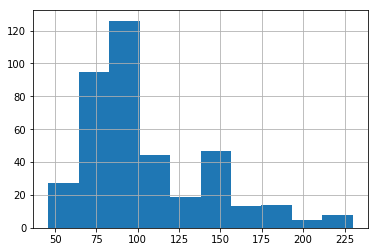

In [31]:
mpg_df.hp.hist()

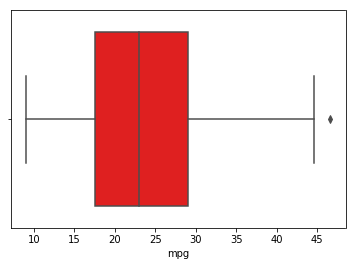

In [32]:
sns.boxplot(mpg_df.mpg,color='red',orient='h') #boxplot for mileage

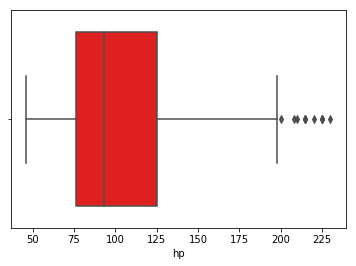

In [33]:
sns.boxplot(mpg_df.hp,color='red',orient='h') #boxplot for hp(horsepower)

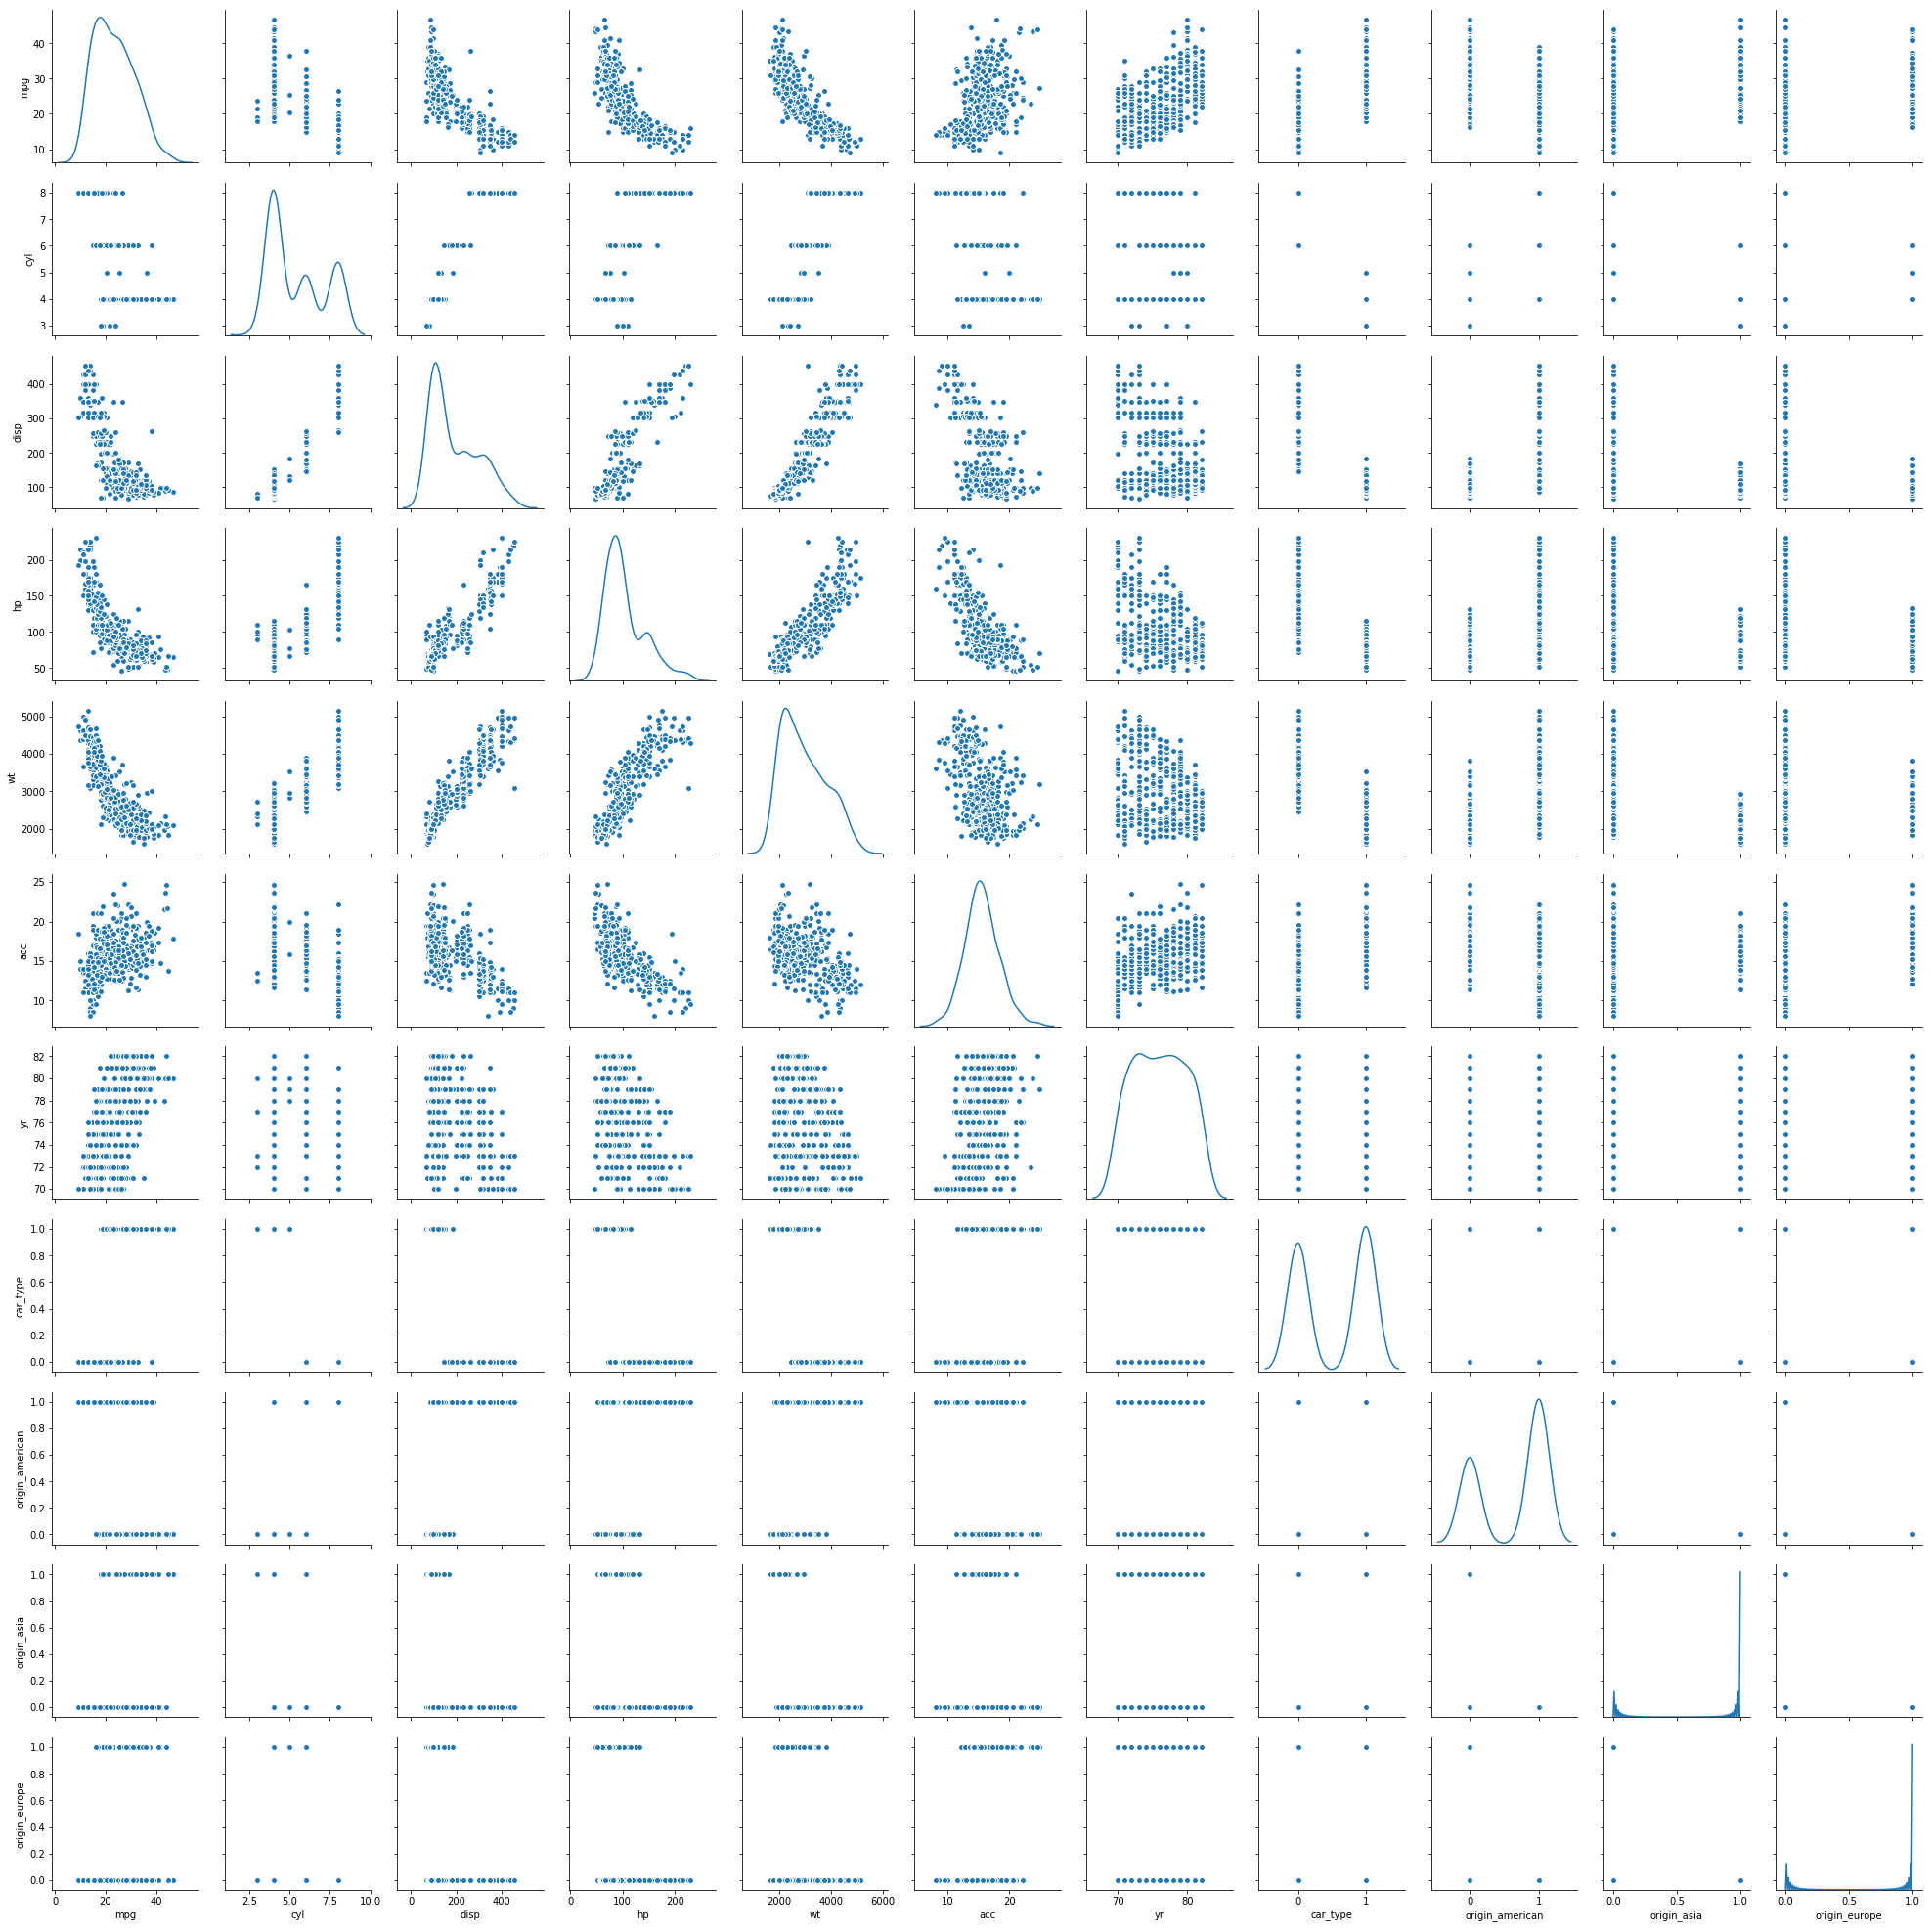

In [34]:
sns.pairplot(mpg_df,diag_kind='kde')

# x-train,y-train,x-test,y-test Concept

In [47]:
#copy all the predictor(independent) varibales into X dataframe and drop mpg since it is a dependent variable
X=mpg_df.drop(['mpg','cyl'],axis=1)

#Copy the 'mpg'column alone into the y dataframe,this is dependent variable
y=mpg_df[['mpg']]

In [56]:
#let us break the X and y dataframes into training set and test set
#for this we use sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [57]:
#split X and y into training and test set in 70:30 ratio

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [58]:
X_train.shape

(278, 9)

In [59]:
X_test.shape

(120, 9)

In [60]:
y_train.shape

(278, 1)

In [61]:
y_test.shape

(120, 1)

In [62]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [64]:
model.score(X_train,y_train)

0.829337716273302

In [67]:
rmse=np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
rmse

mpg    2.935239
dtype: float64

In [43]:
#Effectiveness of the model (performance metric)
sse=np.sum((y_test-y_predict)**2)     
mse=np.sum((y_test-y_predict)**2)/len(y_test)   
sse

mpg    1033.875532
dtype: float64

In [44]:
mse=sse/len(y_test)
mse

mpg    8.615629
dtype: float64

In [45]:
rmse=np.sqrt(mse)
rmse

mpg    2.935239
dtype: float64